In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Dataset_ecommerce.csv",parse_dates=['InvoiceDate'])

In [108]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [110]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [111]:
df = df.dropna(subset=['CustomerID'])

In [112]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [113]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [115]:
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()


In [116]:
print (f'Number of Unique Customers {num_customers}')
print (f'Number of Transactions {num_transactions}')
print (f'Number of Products {num_products}')

Number of Unique Customers 4372
Number of Transactions 22190
Number of Products 9000


In [117]:
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [118]:
print(f' Transaction Period: {date_range[0]}, {date_range[1]}')

 Transaction Period: 2010-12-01 08:26:00, 2011-12-09 12:50:00


In [119]:
 print(f'Rows with negative quantity: {(df.Quantity <= 0 ).sum()}')

Rows with negative quantity: 0


In [120]:
 print(f'Rows with negative UnitPrice : {(df.UnitPrice  <= 0 ).sum()}')

Rows with negative UnitPrice : 0


In [121]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print(top_countries )

Country
Mozambique       3072
Benin            3054
Togo             3053
Nigeria          3051
Burkina Faso     3049
Sierra Leone     3046
Mali             3044
Algeria          3043
Senegal          3040
Niger            3039
Zimbabwe         3036
Sudan            3036
Zambia           3036
Tanzania         3035
Ghana            3035
Ethiopia         3035
Madagascar       3031
Libya            3030
Egypt            3029
Cameroon         3029
Tunisia          3028
Cote d'Ivoire    3026
South Africa     3026
Rwanda           3018
Kenya            3009
Somalia          3008
Morocco          2993
Uganda           2981
Name: CustomerID, dtype: int64


In [122]:
# What country has more customers

top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()
print(top_countries )

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


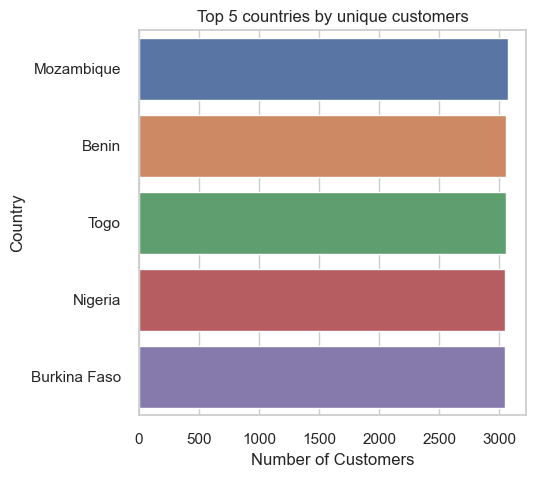

In [123]:
plt.figure(figsize=(5,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 5 countries by unique customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

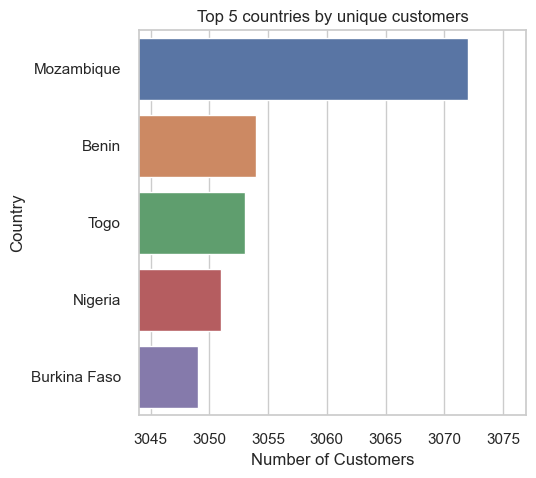

In [124]:
plt.figure(figsize=(5,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlim(min(top_countries.values) - 5,max(top_countries.values) + 5)
plt.title('Top 5 countries by unique customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

In [125]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [126]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [127]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50


In [128]:
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [129]:
# Turn it into a string

monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

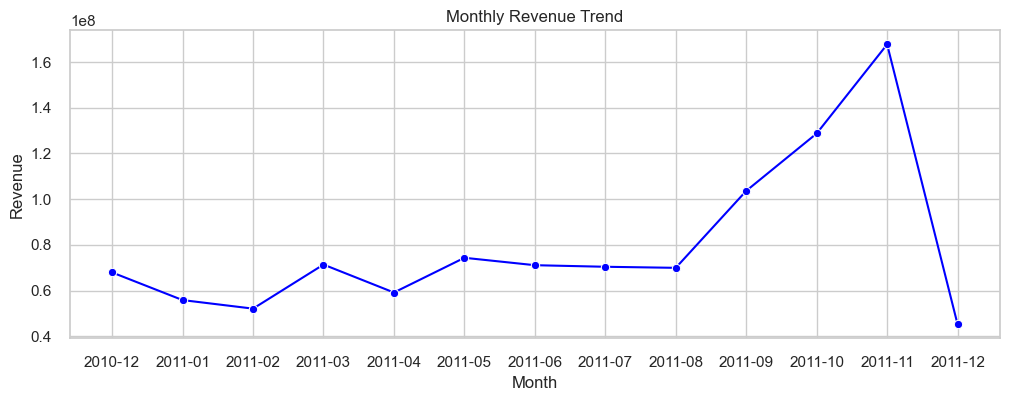

In [130]:
plt.figure(figsize=(12,4))
sns.lineplot(x='InvoiceMonth', y='Revenue', data = monthly_sales, marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

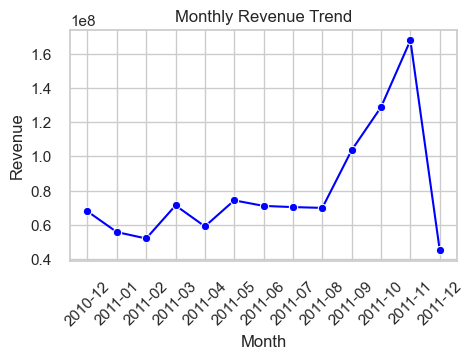

In [131]:
plt.figure(figsize=(5,3))
sns.lineplot(x='InvoiceMonth', y='Revenue', data = monthly_sales, marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [132]:
# Cohort Analysis

In [133]:
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [134]:
cohort_data.name = 'CohortMonth'

In [135]:
cohort_data

CustomerID
12346    2011-01
12347    2010-12
12348    2010-12
12349    2011-11
12350    2011-02
          ...   
18280    2011-03
18281    2011-06
18282    2011-08
18283    2011-01
18287    2011-05
Name: CohortMonth, Length: 4372, dtype: period[M]

In [136]:
df = df.merge(cohort_data, on='CustomerID' )

In [137]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12


In [138]:
# Cohort index - The first month the customer made his first purchase

invoice_year, invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [139]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month 

In [140]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1


In [141]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,CohortIndex
406824,581578,2011-12-09 12:16:00,12713,SC2548,Toys,13,38.60,Ghana,2011-12,501.80,2011-12,1
406825,581578,2011-12-09 12:16:00,12713,SC8736,Cosmetics,44,19.59,Libya,2011-12,861.96,2011-12,1
406826,581578,2011-12-09 12:16:00,12713,SC5158,Books,90,44.22,Morocco,2011-12,3979.80,2011-12,1
406827,581578,2011-12-09 12:16:00,12713,SC9010,Sports Equipment,20,92.38,Mali,2011-12,1847.60,2011-12,1
406828,581578,2011-12-09 12:16:00,12713,SC5695,Sports Equipment,1,19.42,Niger,2011-12,19.42,2011-12,1


In [142]:
print('CohortIndex')

CohortIndex


In [143]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [144]:
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns ='CohortIndex', values='CustomerID')

In [145]:
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


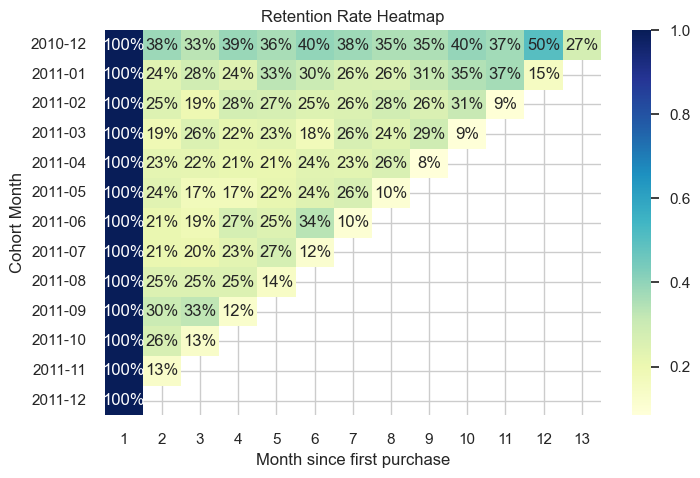

In [147]:
plt.figure(figsize=(8,5))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Retention Rate Heatmap')
plt.xlabel('Month since first purchase')
plt.ylabel('Cohort Month')
plt.show()

In [148]:
[1,2,3,4,5,6,7]

[1, 2, 3, 4, 5, 6, 7]

In [149]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [150]:
# How recently the customer came

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, 
    'InvoiceNo': pd.Series.nunique,
    'Revenue':'sum'
}).reset_index()

In [151]:
rfm.columns= ['CustomerID','recency_days','frequency','monetary']

In [152]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [153]:
rfm.describe()

,recency_days,frequency,monetary
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,5.075480,2.372909e+05
std,100.765435,9.338754,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,1.000000,4.350893e+04
50%,50.000000,3.000000,1.066925e+05
75%,143.000000,5.000000,2.599154e+05
max,374.000000,248.000000,2.038383e+07


In [154]:
X = rfm[['recency_days','frequency','monetary']].copy()

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
ss = StandardScaler

In [157]:
X_scaled = ss

In [53]:
X_scaled.head()

AttributeError: type object 'StandardScaler' has no attribute 'head'

In [158]:
X_scaled[:5] 

TypeError: type 'StandardScaler' is not subscriptable

In [159]:
# How to Fix It: Make sure you're actually calling the scaler and storing the transformed data:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [160]:
X_scaled[:5]


array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

In [161]:
from sklearn.cluster import KMeans

In [162]:
from sklearn.metrics import silhouette_score

In [163]:
inertia = []
s_score = []
K_range = range(2,12)

In [164]:
for k in K_range:
    km = KMeans(n_clusters = k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(X_scaled, labels))
    

In [165]:
inertia

[9046.078478815767,
 5336.966767083277,
 3523.5663091538936,
 2838.8802535207565,
 2324.0626245152575,
 1879.2757377823084,
 1646.4006901120965,
 1489.4757907270555,
 1323.1187606006401,
 1182.006554736192]

In [166]:
s_score

[0.9330481647756176,
 0.5422311480363022,
 0.5823735008137949,
 0.5679347245947542,
 0.5091729236575678,
 0.4779247761713618,
 0.4495042090926778,
 0.37961450363377586,
 0.37973189683845776,
 0.38441908997651775]

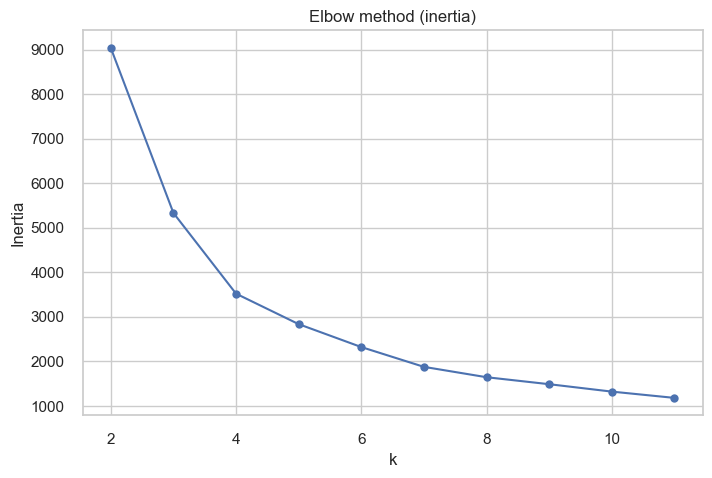

In [167]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow method (inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

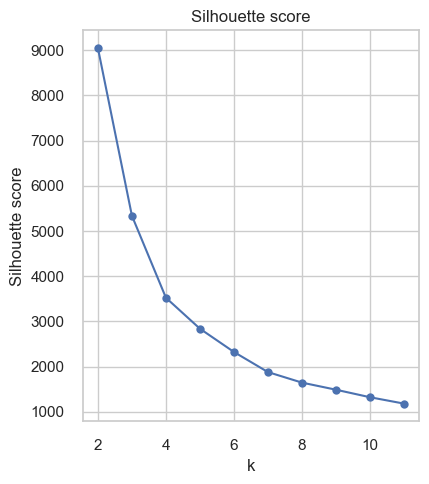

In [168]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
plt.plot(K_range, inertia, marker='o')
plt.title('Silhouette score')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.tight_layout()
plt.show()

In [169]:
!pip install yellowbrick

In [170]:
from yellowbrick.cluster import KElbowVisualizer

In [171]:
model = KMeans(random_state=42)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

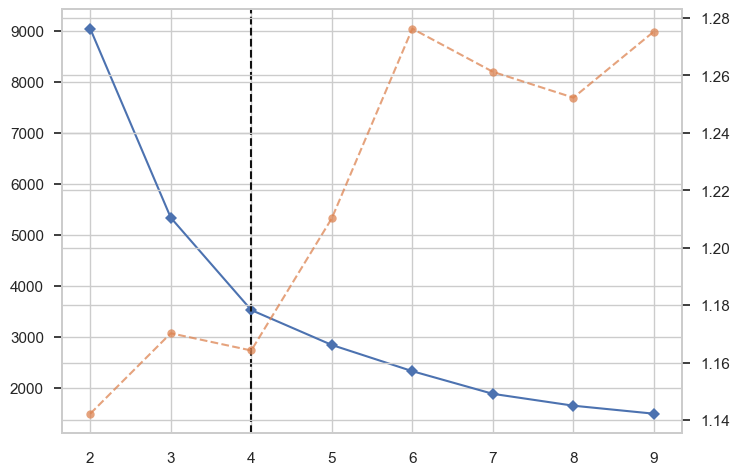

In [172]:
v = KElbowVisualizer(model, k=(2,10))
v.fit(X_scaled)

In [173]:
final_k = 4
final_model = KMeans(n_clusters=final_k, random_state=42)

In [174]:
final_model.fit(X_scaled) 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [175]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [176]:
rfm['Cluster'] = final_model.labels_

In [177]:
rfm.head()

,CustomerID,recency_days,frequency,monetary,Cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1


In [178]:
# Cluster profiling
cluster_profile = rfm.groupby('Cluster').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)    

In [179]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
Cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


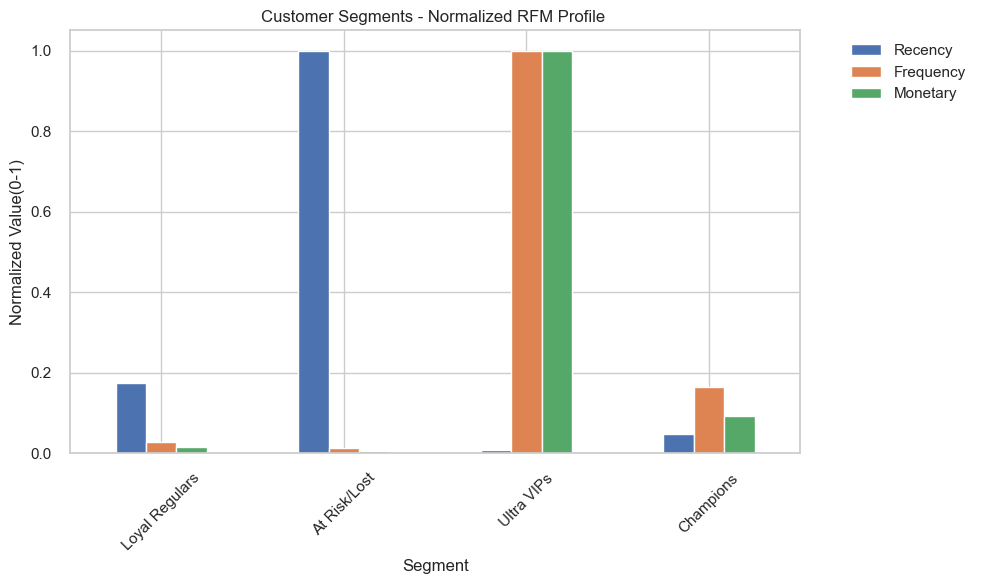

In [180]:
cluster_names = {
    0:"Loyal Regulars",
    1:"At Risk/Lost",
    2:"Ultra VIPs",
    3:"Champions"     
}

cluster_profile['Segment'] = cluster_profile.index.map(cluster_names)

df_plot = cluster_profile.copy()
df_plot[['recency_days','frequency','monetary']] = (
    df_plot[['recency_days','frequency','monetary']]
    .apply(lambda x: x / x.max())
)

df_plot.set_index('Segment')[['recency_days','frequency','monetary']].plot(
    kind='bar', figsize=(10,6) 
)
plt.title("Customer Segments - Normalized RFM Profile ")
plt.ylabel("Normalized Value(0-1)")
plt.xticks(rotation=45)
plt.legend(["Recency","Frequency","Monetary"], bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [181]:
ultra_vips = rfm[rfm['Cluster'] == 2].copy()

In [182]:
ultra_vips

,CustomerID,recency_days,frequency,monetary,Cluster
330,12748,1,224,11912482.34,2
1300,14096,4,34,12965429.74,2
1674,14606,1,128,7144512.92,2
1895,14911,1,248,15362741.47,2
2192,15311,1,118,6301150.63,2
4042,17841,2,169,20383830.65,2


In [185]:
# How do we find which cohort month the most valuable customers belong to

customer_cohort = df[['CustomerID','CohortMonth']].drop_duplicates()
customer_cohort 

,CustomerID,CohortMonth
0,17850,2010-12
312,13047,2010-12
508,12583,2010-12
759,13748,2010-12
787,15100,2010-12
...,...,...
406747,13436,2011-12
406759,15520,2011-12
406777,13298,2011-12
406779,14569,2011-12


In [187]:
customer_cohort = df[['CustomerID','CohortMonth']].drop_duplicates()
cluster2_customers = ultra_vips.merge(customer_cohort, on='CustomerID', how='left')
cluster2_customers

,CustomerID,recency_days,frequency,monetary,Cluster,CohortMonth
0,12748,1,224,11912482.34,2,2010-12
1,14096,4,34,12965429.74,2,2011-08
2,14606,1,128,7144512.92,2,2010-12
3,14911,1,248,15362741.47,2,2010-12
4,15311,1,118,6301150.63,2,2010-12
5,17841,2,169,20383830.65,2,2010-12


In [188]:
# At Risk/Lost
at_risk = rfm[rfm['Cluster'] == 1].copy()
at_risk

,CustomerID,recency_days,frequency,monetary,Cluster
0,12346,326,2,5342.40,1
4,12350,310,1,48173.37,1
6,12353,204,1,4357.89,1
7,12354,232,1,161522.49,1
8,12355,214,1,37648.28,1
...,...,...,...,...,...
4350,18256,355,1,3317.66,1
4353,18260,173,8,349885.06,1
4359,18269,358,2,18542.07,1
4367,18280,278,1,18907.36,1


In [189]:
champions = rfm[rfm['Cluster'] == 3].copy()
champions

,CustomerID,recency_days,frequency,monetary,Cluster
55,12415,24,26,1944187.00,3
69,12431,36,18,541433.70,3
75,12437,2,19,517110.85,3
100,12471,2,49,1351390.04,3
101,12472,31,13,927503.20,3
...,...,...,...,...,...
4305,18198,4,21,407944.69,3
4324,18223,2,27,770695.42,3
4326,18225,3,17,753284.92,3
4330,18229,12,20,372558.19,3


In [190]:
# Join RFM results back to your cohort data

In [202]:
# Example scoring using quantiles
rfm['R_Score'] = pd.qcut(rfm['recency_days'], 5, labels=[5,4,3,2,1])  # lower recency = better
rfm['F_Score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])


In [203]:
# Combine scores into one code
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Assign named segments (example mapping)
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Ultra VIPs'
    elif row['F_Score'] >= 3:
        return 'Champions'
    elif row['R_Score'] <= 2:
        return 'Loyal Regulars'
    else:
        return 'At Risk'

rfm['RFM_Segment'] = rfm.apply(segment_customer, axis=1)


In [204]:
rfm_cohorts = rfm.merge(cohort_data, on='CustomerID')


In [205]:
valuable_by_month = (
    rfm_cohorts.groupby(['CohortMonth', 'RFM_Segment'])['CustomerID']
    .nunique()
    .reset_index()
)

# Filter for high-value segments
valuable_customers = valuable_by_month[
    valuable_by_month['RFM_Segment'].isin(['Champions', 'Ultra VIPs'])
]


In [206]:
rfm_cohorts = rfm.merge(cohort_data, on='CustomerID')


In [207]:
rfm_by_cohort = rfm_cohorts.groupby('CohortMonth')[['recency_days', 'frequency', 'monetary']].mean()



In [208]:
rfm_by_cohort

,recency_days,frequency,monetary
CohortMonth,,,
2010-12,99.472574,10.885021,477332.712922
2011-01,114.510689,6.182898,297004.916437
2011-02,127.171053,4.765789,202220.413158
2011-03,127.504545,4.213636,194181.350909
2011-04,124.294314,3.625418,165797.526589
2011-05,107.293907,3.308244,142386.076918
2011-06,92.846809,3.217021,149848.026851
2011-07,88.492147,2.670157,141974.535916
2011-08,72.832335,2.550898,197094.015389


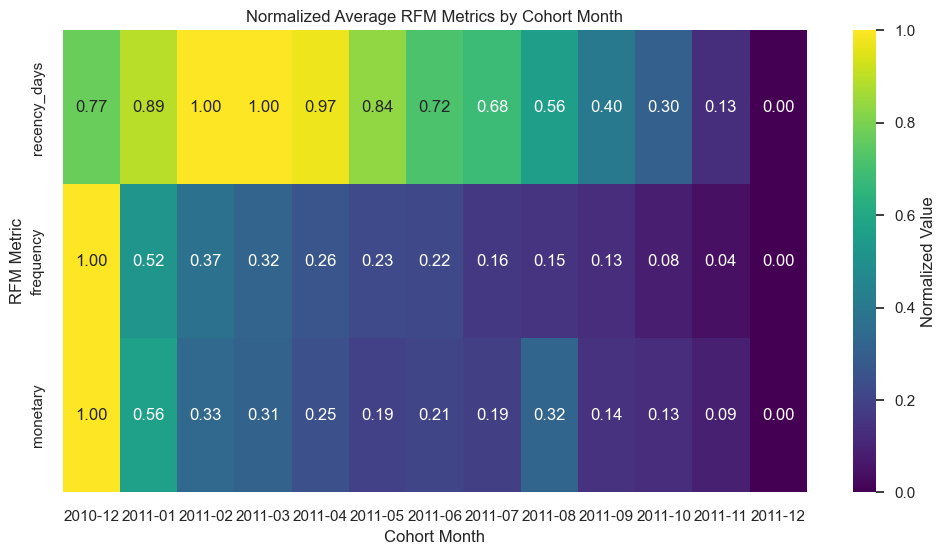

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create output directory
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Define the data
data = {
    'CohortMonth': ['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
                    '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12'],
    'recency_days': [99.472574, 114.510689, 127.171053, 127.504545, 124.294314, 107.293907,
                     92.846809, 88.492147, 72.832335, 53.942953, 41.593750, 20.613707, 4.341463],
    'frequency': [10.885021, 6.182898, 4.765789, 4.213636, 3.625418, 3.308244, 3.217021,
                  2.670157, 2.550898, 2.348993, 1.928977, 1.495327, 1.097561],
    'monetary': [477332.712922, 297004.916437, 202220.413158, 194181.350909, 165797.526589,
                 142386.076918, 149848.026851, 141974.535916, 197094.015389, 123657.617953,
                 117342.466733, 100474.992087, 64619.463171]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('CohortMonth', inplace=True)

# Normalize the data for better heatmap visualization
df_normalized = df.copy()
df_normalized = (df_normalized - df_normalized.min()) / (df_normalized.max() - df_normalized.min())

# Set seaborn style
sns.set(style='whitegrid')

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized.T, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Normalized Value'})
plt.title('Normalized Average RFM Metrics by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('RFM Metric')
plt.show()

# Save the plot
output_path = os.path.join(output_dir, 'rfm_heatmap.png')
plt.tight_layout()
plt.savefig(output_path)
plt.close()
plt.show()

<Axes: xlabel='CohortMonth'>

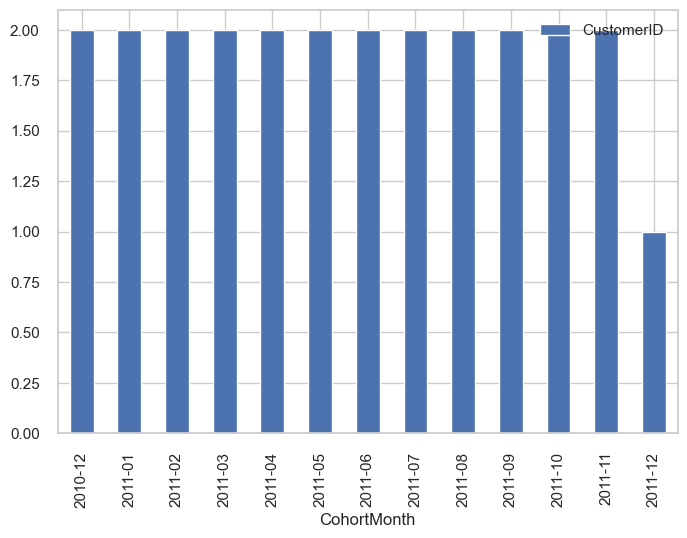

In [210]:
valuable_summary = valuable_customers.groupby('CohortMonth')['CustomerID'].count().reset_index()
valuable_summary.plot(x='CohortMonth', y='CustomerID', kind='bar')


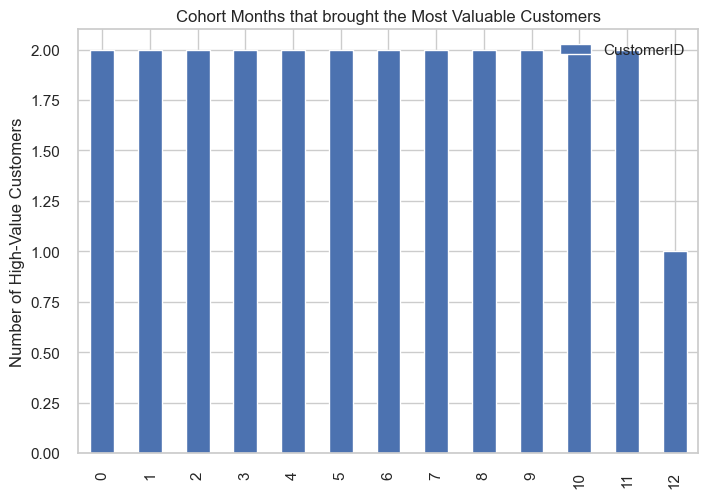

In [211]:
import matplotlib.pyplot as plt

valuable_summary.plot(kind='bar')
plt.title("Cohort Months that brought the Most Valuable Customers")
plt.ylabel("Number of High-Value Customers")
plt.show()

In [212]:
ultra_vips = rfm[rfm['Cluster']==2].copy()
ultra_vips

,CustomerID,recency_days,frequency,monetary,Cluster,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
330,12748,1,224,11912482.34,2,5,5,5,555,Ultra VIPs
1300,14096,4,34,12965429.74,2,5,5,5,555,Ultra VIPs
1674,14606,1,128,7144512.92,2,5,5,5,555,Ultra VIPs
1895,14911,1,248,15362741.47,2,5,5,5,555,Ultra VIPs
2192,15311,1,118,6301150.63,2,5,5,5,555,Ultra VIPs
4042,17841,2,169,20383830.65,2,5,5,5,555,Ultra VIPs
